In [59]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


### **Step-1  Dataset Understanding**

In [45]:
df = pd.read_csv("Crude_oil.csv")

In [46]:
df.shape

(2548, 6)

In [47]:
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,10/28/2022,87.90,241417.0,88.67,88.76,87.08
1,10/27/2022,88.26,273717.0,88.26,89.79,87.33
2,10/26/2022,87.91,271474.0,85.07,88.41,84.14
3,10/25/2022,85.32,226337.0,84.88,86.03,83.06
4,10/24/2022,84.58,238458.0,85.24,85.92,82.63


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2548 entries, 0 to 2547
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2548 non-null   object 
 1   Close/Last  2548 non-null   float64
 2   Volume      2517 non-null   float64
 3   Open        2548 non-null   float64
 4   High        2548 non-null   float64
 5   Low         2548 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.6+ KB


In [49]:
df.isna().sum()

Date           0
Close/Last     0
Volume        31
Open           0
High           0
Low            0
dtype: int64

In [50]:
df.describe()

,Close/Last,Volume,Open,High,Low
count,2548.000000,2.517000e+03,2548.000000,2548.000000,2548.000000
mean,66.043740,3.954717e+05,66.042500,66.959839,65.065043
std,22.732093,2.345385e+05,22.710749,22.820487,22.565127
min,-37.630000,1.530000e+02,-37.250000,-35.200000,-40.320000
25%,48.620000,2.244770e+05,48.665000,49.317500,47.800000
50%,59.720000,3.638160e+05,59.770000,60.545000,58.850000
75%,87.467500,5.581500e+05,87.450000,88.695000,86.342500
max,123.700000,1.693652e+06,124.580000,129.440000,120.790000


In [51]:
df.duplicated().sum()

np.int64(0)

### **Step-2 Preprocessing**


In [ ]:
# Step-2.1 --> Converting 'Date' column to datetime format and setting it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)
df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2012-10-30,85.68,NaN,85.68,85.68,85.68
2012-10-31,86.24,192354.0,85.73,87.19,85.61
2012-11-01,87.09,185097.0,86.10,87.42,85.92
2012-11-02,84.86,273619.0,86.91,87.24,84.66
2012-11-05,85.65,185846.0,84.65,85.90,84.34


In [53]:
df.isnull().sum()

Close/Last     0
Volume        31
Open           0
High           0
Low            0
dtype: int64

In [ ]:
# Step-2.2 --> Handling Missing Values
# using forward fill method to fill the missing values and also renaming column for consistency (Close/Last) As Close
df.rename(columns={'Close/Last': 'Close'}, inplace=True)
df['Volume'] = df['Volume'].ffill().bfill()
# df.isnull().sum()

Close     0
Volume    0
Open      0
High      0
Low       0
dtype: int64

### **Step 3: Exploratory Data Analysis (EDA)**

In [64]:
# Step-3.1 Basic Numerical summary
# .T flips rows ↔ columns.

df[['Open', 'High', 'Low', 'Close', 'Volume']].describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2548.0,66.042500,22.710749,-37.25,48.6650,59.770,87.4500,124.58
High,2548.0,66.959839,22.820487,-35.20,49.3175,60.545,88.6950,129.44
Low,2548.0,65.065043,22.565127,-40.32,47.8000,58.850,86.3425,120.79
Close,2548.0,66.043740,22.732093,-37.63,48.6200,59.720,87.4675,123.70
Volume,2548.0,392403.096154,235066.581496,153.00,220238.5000,360841.000,555833.5000,1693652.00


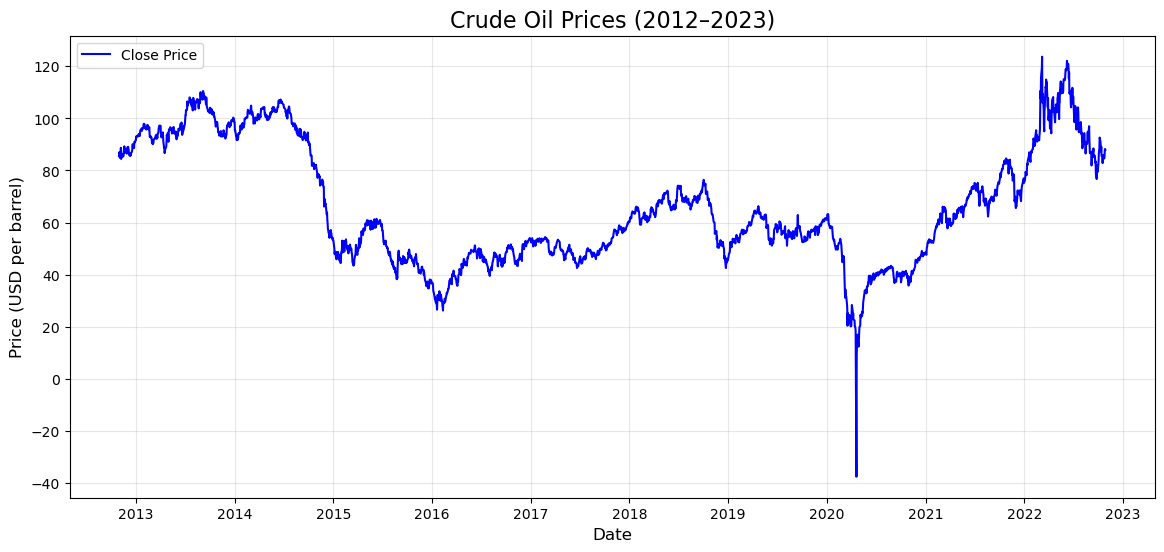

In [66]:
# Step-3.2 time series plot for 'Close' price over time

plt.figure(figsize=(14,6))
plt.plot(df.index, df['Close'], color='blue', linewidth=1.5, label='Close Price')
plt.title('Crude Oil Prices (2012–2023)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD per barrel)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()